In [1]:
# Dependencies and Setup
import openweathermapy as ow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Outline stylesheet to use for plots
plt.style.use('seaborn-darkgrid')

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls

In [3]:
# Create a settings dictionary with your API key and preferred units
settings = {"units": "imperial", "appid": api_key}

In [4]:
# Store base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set up lists to hold reponse info
clouds = []
country = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(f"Processing request for {city}")
    response = requests.get(url + "appid=" + api_key + "&q=" + city +"&units=imperial").json()
    try:
        clouds.append(response["clouds"]["all"])
    except KeyError:
        clouds.append("NaN")
    try:
        country.append(response["sys"]["country"])
    except KeyError:
        country.append("NaN")
    try:
        humidity.append(response["main"]["humidity"])
    except KeyError:
        humidity.append("NaN")
    try:
        lat.append(response["coord"]["lat"])
    except KeyError:
        lat.append("NaN")
    try:
        lon.append(response["coord"]["lon"])
    except KeyError:
        lon.append("NaN")
    try:
        max_temp.append(response["main"]["temp_max"])
    except KeyError:
        max_temp.append("NaN")
    try:
        wind_speed.append(response["wind"]["speed"])
    except KeyError:
        wind_speed.append("NaN")

Processing request for lolua
Processing request for kaitangata
Processing request for albany
Processing request for hamilton
Processing request for castro
Processing request for quatre cocos
Processing request for port alfred
Processing request for jawhar
Processing request for alta floresta
Processing request for samarai
Processing request for nikolskoye
Processing request for ushuaia
Processing request for hilo
Processing request for bredasdorp
Processing request for khipro
Processing request for ribeira grande
Processing request for saint-philippe
Processing request for buala
Processing request for arman
Processing request for bambous virieux
Processing request for atuona
Processing request for butaritari
Processing request for helong
Processing request for ancud
Processing request for valparaiso
Processing request for kahului
Processing request for mataura
Processing request for lompoc
Processing request for rikitea
Processing request for nanortalik
Processing request for labutta
P

Processing request for kashi
Processing request for ponta do sol
Processing request for carnarvon
Processing request for nianzishan
Processing request for payo
Processing request for san cristobal
Processing request for haapiti
Processing request for orange cove
Processing request for norman wells
Processing request for tautira
Processing request for alofi
Processing request for tomatlan
Processing request for dikson
Processing request for serenje
Processing request for hasaki
Processing request for nieuw amsterdam
Processing request for olinda
Processing request for mergui
Processing request for wanning
Processing request for sainte-rose
Processing request for tiznit
Processing request for avera
Processing request for bathsheba
Processing request for ahipara
Processing request for ventspils
Processing request for georgetown
Processing request for sturgeon falls
Processing request for roald
Processing request for oromocto
Processing request for atbasar
Processing request for port blair

Processing request for rapina
Processing request for aksu
Processing request for port lincoln
Processing request for buraydah
Processing request for turukhansk
Processing request for tuy hoa
Processing request for miri
Processing request for eskisehir
Processing request for umzimvubu
Processing request for okhotsk
Processing request for thessalon
Processing request for saint-louis
Processing request for toora-khem
Processing request for isiro
Processing request for tsogni
Processing request for diu
Processing request for amapa
Processing request for nador
Processing request for yarmouth
Processing request for palmares do sul
Processing request for namatanai
Processing request for mandera
Processing request for sawakin
Processing request for walvis bay
Processing request for kiruna
Processing request for andenes
Processing request for oranjemund
Processing request for katherine
Processing request for makueni
Processing request for prince rupert
Processing request for goedereede
Processi

### Convert Raw Data to DataFrame

In [5]:
# create a dictionary from cities and response values
weather_dict = {
    "city": cities,
    "clouds": clouds,
    "country": country,
    "humidity": humidity,
    "lat": lat,
    "lon": lon,
    "max_temp": max_temp,
    "wind_speed": wind_speed
}

#Convert dictionary to dataframe
weather_data = pd.DataFrame(weather_dict)

#Preview dataframe
weather_data.head()

,city,clouds,country,humidity,lat,lon,max_temp,wind_speed
0,lolua,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kaitangata,86,NZ,81,-46.28,169.85,55.13,17.16
2,albany,75,US,51,42.6,-73.97,39,5.82
3,hamilton,90,US,87,39.18,-84.53,48.99,2.37
4,castro,1,BR,96,-24.79,-50.01,62.65,8.55


In [6]:
#Add today's date to dataframe
date = pd.Timestamp("today").strftime("%m/%d/%Y")
weather_data["date"] = date

#Preview dataframe with new column
weather_data.head()

,city,clouds,country,humidity,lat,lon,max_temp,wind_speed,date
0,lolua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03/11/2020
1,kaitangata,86,NZ,81,-46.28,169.85,55.13,17.16,03/11/2020
2,albany,75,US,51,42.6,-73.97,39,5.82,03/11/2020
3,hamilton,90,US,87,39.18,-84.53,48.99,2.37,03/11/2020
4,castro,1,BR,96,-24.79,-50.01,62.65,8.55,03/11/2020


In [18]:
#Convert NaN from string to float
nan_value = float("NaN")
weather_data.replace("NaN", nan_value, inplace=True)

#Remove all NaN rows
weather_data_final = weather_data.dropna()
#Preview dataframe
weather_data_final.head()

,city,clouds,country,humidity,lat,lon,max_temp,wind_speed,date
1,kaitangata,86.0,NZ,81.0,-46.28,169.85,55.13,17.16,03/11/2020
2,albany,75.0,US,51.0,42.60,-73.97,39.00,5.82,03/11/2020
3,hamilton,90.0,US,87.0,39.18,-84.53,48.99,2.37,03/11/2020
4,castro,1.0,BR,96.0,-24.79,-50.01,62.65,8.55,03/11/2020
5,quatre cocos,40.0,MU,100.0,-20.21,57.76,79.00,9.55,03/11/2020


In [19]:
#Save dataframe to csv
weather_data_final.to_csv(r"Results/weather_data.csv")

### Plotting the Data

#### Latitude vs. Temperature Plot

TypeError: -46.28 is not a string

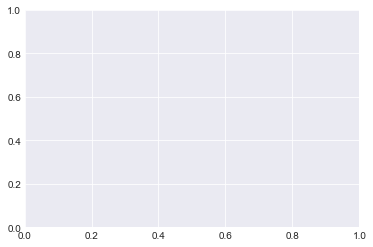

In [20]:
#Create scatter plot showing the relationship of latitude and max temperatures for today
plt.scatter(lat, max_temp, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.grid(True)
plt.savefig("Results/max_temp-latitude.png")

#### Latitude vs. Humidity Plot

TypeError: -46.28 is not a string

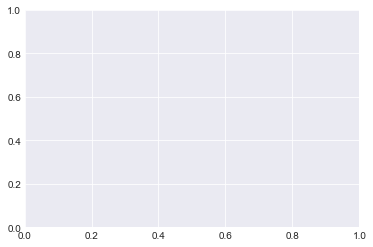

In [21]:
#Create scatter plot showing the relationship of latitude and humidity for today
plt.scatter(lat, humidity, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Results/humidity-latitude.png")

#### Latitude vs. Cloudiness Plot

In [ ]:
#Create scatter plot showing the relationship of latitude and cloudiness for today
plt.scatter(lat, clouds, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Results/cloudiness-latitude.png")

#### Latitude vs. Wind Speed Plot

In [ ]:
#Create scatter plot showing the relationship of latitude and wind speed for today
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Windspeed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Results/wind_speed-latitude.png")

### Today's Weather
* As expected, today's max temperatures were highest in cities closest to the equator. As you move away from the equator, the day's max temperatures drops.
* The majority of cities measured saw humidity levels of 70% and above today regardless of their proximity to the equator.
* The wind speed in most cities was low today with the bulk of the cities measured showing wind speeds under 10 mph regardless of their latitudnal position.

In [ ]:
#Create scatter plot showing the relationship of latitude and max temperatures for today
plt.figure(figsize=(6,6))
plt.scatter(lat, max_temp, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.grid(True)

plt.savefig("Results/max_temp-latitude-sq.png")

In [ ]:
#Create scatter plot showing the relationship of latitude and humidity for today
plt.figure(figsize=(6,6))
plt.scatter(lat, humidity, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Results/humidity-latitude-sq.png")

In [ ]:
#Create scatter plot showing the relationship of latitude and cloudiness for today
plt.figure(figsize=(6,6))
plt.scatter(lat, clouds, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Results/cloudiness-latitude-sq.png")

In [ ]:
#Create scatter plot showing the relationship of latitude and wind speed for today
plt.figure(figsize=(6,6))
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Windspeed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Results/wind_speed-latitude-sq.png")

In [ ]:
weather_data.to_html('weather_data.html')